In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
from sklearn.datasets import load_breast_cancer

In [7]:
b_cancer = load_breast_cancer()

In [22]:
b_cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [14]:
len(b_cancer['feature_names']) #dataset has 30 features!

30

In [23]:
print(b_cancer['DESCR'])

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [17]:
df = pd.DataFrame(data=b_cancer['data'], columns=b_cancer['feature_names']) #note that df does not contain the target class!

In [18]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [19]:
df['target']=b_cancer['target']

In [21]:
df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

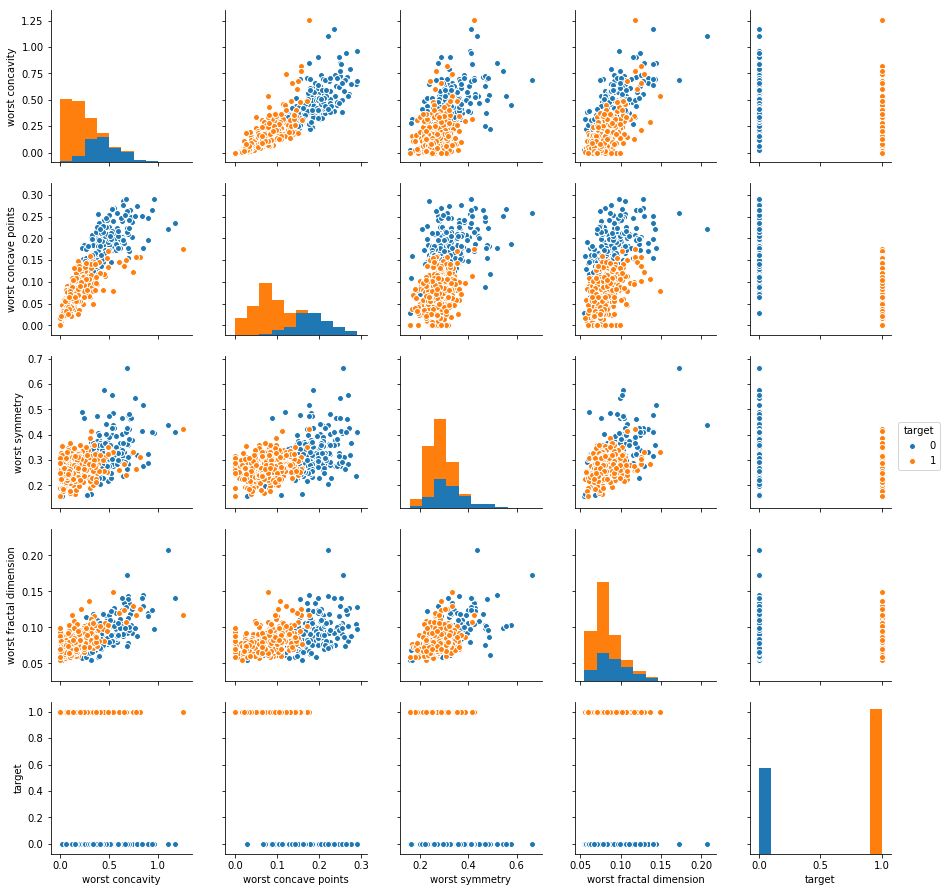

In [66]:
sns.pairplot(df[df.columns[-5:]], hue='target')

As can be seen, some of the features are really good in separating the target classes

In [67]:
from sklearn.model_selection import train_test_split

In [94]:
X_NotScld = df.drop('target', axis=1)
y_NotScld = df['target']

In [95]:
X_NS_train, X_NS_test, y_NS_train, y_NS_test = train_test_split(X_NotScld, y_NotScld, test_size=0.33)

In [70]:
from sklearn.svm import SVC

In [71]:
svc = SVC()

In [72]:
svc.fit(X_NS_train, y_NS_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [73]:
predictions = svc.predict(X_NS_test)

In [74]:
from sklearn.metrics import classification_report, confusion_matrix

In [75]:
print(classification_report(y_NS_test, predictions))
print(confusion_matrix(y_NS_test, predictions))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        61
          1       0.68      1.00      0.81       127

avg / total       0.46      0.68      0.54       188

[[  0  61]
 [  0 127]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


We have predicted everything to be of class 1!! Now, let's try normalizing the data as we have many dimensions with various scales

In [76]:
from sklearn.preprocessing import StandardScaler

In [77]:
scaler = StandardScaler()

In [78]:
scaler.fit(df.drop('target', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [79]:
scaled_features = scaler.transform(df.drop('target', axis=1))

In [81]:
scaled_df = pd.DataFrame(data=scaled_features, columns=df.columns[:-1])

In [104]:
X = scaled_df
y = df['target']

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [85]:
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [86]:
predictions = svc.predict(X_test)

In [87]:
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

             precision    recall  f1-score   support

          0       0.97      0.97      0.97        61
          1       0.98      0.98      0.98       127

avg / total       0.98      0.98      0.98       188

[[ 59   2]
 [  2 125]]


Almost perfect! now the other thing that we can do is to try grid search for df values.

In [88]:
from sklearn.grid_search import GridSearchCV

In [89]:
param_grid = {'C': [0.1, 1, 10, 100],
             'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

In [90]:
grid = GridSearchCV(svc, param_grid, verbose=2)

In [96]:
grid.fit(X_NS_train, y_NS_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................................... C=0.1, gamma=1 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................................... C=0.1, gamma=1 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................................... C=0.1, gamma=1 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................................... C=0.1, gamma=0.1 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................................... C=0.1, gamma=0.1 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................................... C=0.1, gamma=0.1 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ........................................... C=1, gamma=1 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................................... C=1, gamma=1 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................................... C=1, gamma=0.1 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................................... C=1, gamma=0.1 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................................... C=1, gamma=0.1 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................................ C=1, gamma=0.01 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................................ C=1, gamma=0.01 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.6s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=2)

In [97]:
grid.best_params_

{'C': 1, 'gamma': 0.0001}

In [98]:
grid.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [99]:
grid_pred = grid.predict(X_NS_test)

In [100]:
print(classification_report(y_NS_test, grid_pred))
print(confusion_matrix(y_NS_test, grid_pred))

             precision    recall  f1-score   support

          0       0.85      0.85      0.85        60
          1       0.93      0.93      0.93       128

avg / total       0.90      0.90      0.90       188

[[ 51   9]
 [  9 119]]


Grid search helps to improve the performance on unscaled data. However, default parameters were quite satisfactory when applied on standardized data.
In general, every ML algorithm which is dependant on the distance between features in vector space requires standardization.

Now, as you see we have 30 features and some of those are correlated to each other. It is good practice to perform dimentionality reduction on the data using PCA

In [102]:
from sklearn.decomposition import PCA

In [103]:
pca = PCA() # PCA will run with the n_components equal to n_features in your data as default

In [115]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [116]:
pca.components_.shape

(30, 30)

In [117]:
cum_var = np.cumsum(pca.explained_variance_ratio_)

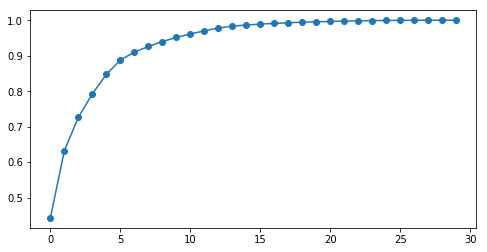

In [118]:
plt.figure(figsize=(8,4))
plt.plot(cum_var, marker='o')
plt.xlabel = 'n_components'
plt.ylabel = 'Cummulative variance explained'

It seems that we can explain about 95% of the variance in data by setting n_components = 10

In [114]:
pca_10 = PCA(10)

In [119]:
pca_10.fit(X)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [122]:
pca_comp_df = pd.DataFrame(pca_10.components_, columns=scaled_df.columns)

In [135]:
pca_comp_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339
2,-0.008531,0.064550,-0.009314,0.028700,-0.104292,-0.074092,0.002734,-0.025564,-0.040240,-0.022574,...,-0.047507,-0.042298,-0.048547,-0.011902,-0.259798,-0.236076,-0.173057,-0.170344,-0.271313,-0.232791
3,0.041409,-0.603050,0.041983,0.053434,0.159383,0.031795,0.019123,0.065336,0.067125,0.048587,...,0.015417,-0.632808,0.013803,0.025895,0.017652,-0.091328,-0.073951,0.006007,-0.036251,-0.077053
4,0.037786,-0.049469,0.037375,0.010331,-0.365089,0.011704,0.086375,-0.043861,-0.305941,-0.044424,...,-0.004407,-0.092883,0.007454,-0.027391,-0.324435,0.121804,0.188519,0.043332,-0.244559,0.094423


In [127]:
np_pca = pca_10.transform(scaled_df)

In [128]:
np_pca.shape

(569, 10)

Now df_pca can be used to impelement other ML classifications

In [131]:
df_pca = pd.DataFrame(np_pca, columns = ['component_'+ str(i) for i in range(1,11)])

In [132]:
df_pca.head(5)

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398408,-0.157119,-0.877405
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240988,-0.711905,1.106995
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097374,0.024066,0.454278
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059566,-1.405439,-1.116970
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263806,0.377704


In [133]:
df_pca.describe()

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,1.966792e-16,-8.351062e-17,1.951183e-18,7.804731e-17,3.731637e-17,-4.097484e-17,-1.248757e-17,1.209733e-17,6.214517e-17,6.764507e-17
std,3.647601e+00,2.387755e+00,1.680152e+00,1.408591e+00,1.285159e+00,1.099765e+00,8.224408e-01,6.909821e-01,6.462420e-01,5.927148e-01
min,-5.565736e+00,-7.775853e+00,-4.880361e+00,-5.133988e+00,-4.789656e+00,-4.217768e+00,-4.084684e+00,-3.953162e+00,-2.969338e+00,-2.738155e+00
25%,-2.757430e+00,-1.499825e+00,-1.017071e+00,-7.863120e-01,-6.160920e-01,-7.280625e-01,-4.478906e-01,-3.729314e-01,-3.237089e-01,-3.661185e-01
50%,-1.173831e+00,-1.959558e-01,-1.557020e-01,1.155658e-01,-2.898355e-02,-7.241380e-02,-1.817806e-02,1.363074e-02,1.254536e-02,2.339687e-03
75%,2.508766e+00,1.228297e+00,8.568268e-01,9.694156e-01,6.108408e-01,6.169900e-01,4.540371e-01,3.497730e-01,3.625406e-01,3.262763e-01
max,1.631923e+01,1.257319e+01,1.011242e+01,5.194270e+00,7.490434e+00,5.134228e+00,5.417219e+00,4.362306e+00,3.784119e+00,3.192642e+00


In [136]:
X_pca = df_pca

In [137]:
X_pca_train, X_pca_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.33)

In [138]:
svc.fit(X_pca_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [139]:
svc_pred = svc.predict(X_pca_test)

In [140]:
print(classification_report(y_test, svc_pred))
print(confusion_matrix(y_test, svc_pred))

             precision    recall  f1-score   support

          0       1.00      0.93      0.96        72
          1       0.96      1.00      0.98       116

avg / total       0.97      0.97      0.97       188

[[ 67   5]
 [  0 116]]
